In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
trips = pd.read_csv('tp_bike/trip.csv')

In [10]:
trips.groupby('subscription_type').count()
#la suma de los tipos de subscriptores es de 669959

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,zip_code
subscription_type,,,,,,,,,,
Customer,103213,103213,103213,103213,103213,103213,103213,103213,103213,96594
Subscriber,566746,566746,566746,566746,566746,566746,566746,566746,566746,566746


In [11]:
#la suma de los tipos de subscriptores es de 669959
trips.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [12]:
#hay dos tipos de subscriptores, realizo una columna mas para cada tipo
trips['type_num_subscription'] = trips.subscription_type.map({'Subscriber':1, 'Customer':0})

In [13]:
numSuscripcion = trips['type_num_subscription'].value_counts()
numSuscripcion
#numSuscripcion.reindex(['Subscriber','Customer'],method = '')

1    566746
0    103213
Name: type_num_subscription, dtype: int64

In [14]:
numSuscripcion = numSuscripcion.rename({1:'Subscriber',0:'Costumer'}) #le cambio el nombre al indice
numSuscripcion

Subscriber    566746
Costumer      103213
Name: type_num_subscription, dtype: int64

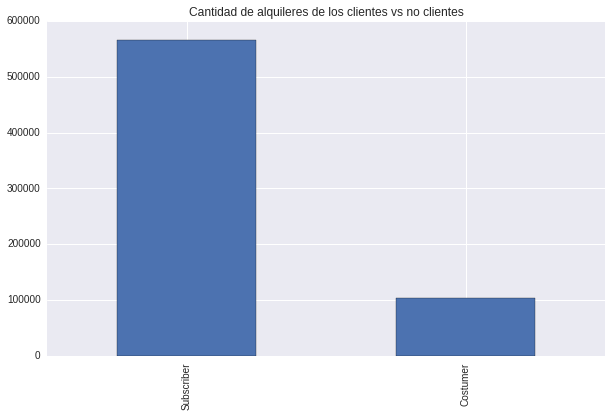

In [17]:
## Aca seria el posta
plt.title("Cantidad de alquileres de los clientes vs no clientes")
numSuscripcion.plot(kind = 'bar', figsize = (10,6));

# Promedio de tiempo de viaje entre Subscriber y Customer

In [30]:
trips.head(3)

,id,duration,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,type_num_subscription,date_start,time_start,month_start,day_start,hour_start
0,4576,63,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,1,2013-08-29,14:13,8,Thursday,14
1,4607,70,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,1,2013-08-29,14:42,8,Thursday,14
2,4130,71,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,1,2013-08-29,10:16,8,Thursday,10


In [21]:
#separo la fecha y la hora
fechaYhora = trips['start_date'].str.split(' ')
fecha = fechaYhora.map(lambda x: x[0])
hora = fechaYhora.map(lambda x: x[1])
trips = trips.assign(date_start = fecha, time_start = hora)

In [23]:
del trips['start_date']

In [28]:
import calendar
trips['date_start'] = pd.to_datetime(trips['date_start'])
trips['month_start'] = trips['date_start'].map(lambda x: x.month)
trips['day_start'] = trips['date_start'].map(lambda x: x.weekday_name)

In [29]:
trips['hour_start'] = pd.to_datetime(trips['time_start']\
                    , format = '%H:%M', errors = 'coerce').dt.hour

In [32]:
trips.sort_values('duration', ascending=False)[0:3]

,id,duration,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,type_num_subscription,date_start,time_start,month_start,day_start,hour_start
573566,568474,17270400,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531,0,2014-12-06,21:59,12,Saturday,21
382718,825850,2137000,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213,0,2015-06-28,21:50,6,Sunday,21
440339,750192,1852590,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024,1,2015-05-02,6:17,5,Saturday,6


In [66]:
#Subscriber
tripSub = trips.loc[trips.subscription_type.str.contains('Subscriber')]\
               .loc[trips.duration >= 10,:].loc[trips.duration <=86400] #un dia

In [38]:
#tripSub.info() #estoy usando un 80% del set original 

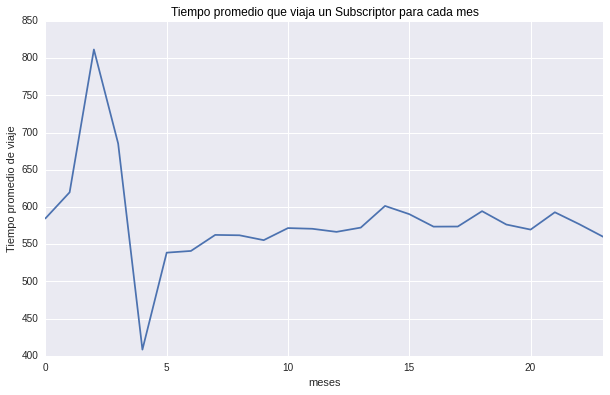

In [67]:
plt.title('Tiempo promedio que viaja un Subscriptor para cada mes',color='black')
tripSub.groupby('hour_start').mean()['duration'].plot(figsize=(10,6));
plt.ylabel('Tiempo promedio de viaje')
plt.xlabel('meses')

In [62]:
#Customer
tripCus = trips.loc[trips.subscription_type.str.contains('Customer')]\
               .loc[trips.duration >= 60,:].loc[trips.duration <=86400] #un dia
    

In [49]:
#tripCus.info()

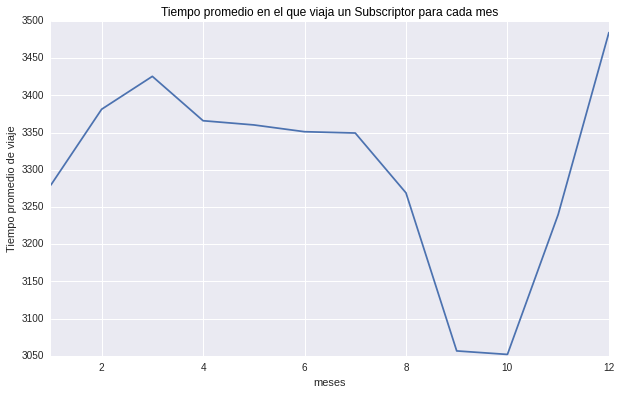

In [65]:
plt.title('Tiempo promedio que viaja un Customer para cada mes',color='black')
tripCus.groupby('month_start').mean()['duration'].plot(figsize=(10,6));
plt.ylabel('Tiempo promedio de viaje')
plt.xlabel('meses')

In [68]:
#HAY QUE SOLUCIONAR EL TEMA DE EL EJE Y NO COMIENZA DESDE CERO